In [33]:
# Setup

# For UV users [ Remove uv for normal pip users ]
!uv pip install ultralytics matplotlib numpy opencv-python supervision dotenv

%load_ext dotenv
%dotenv

Resolved 44 packages in 217ms
Prepared 2 packages in 27ms
Installed 2 packages in 31ms
 + dotenv==0.9.9
 + python-dotenv==1.1.0


In [40]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import supervision as sv

In [41]:
model = YOLO("yolov8s.pt")

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

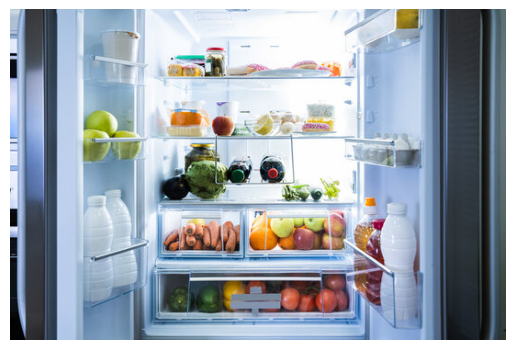

In [42]:
image = cv2.imread("images/fridge_example_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")

In [43]:
results = model(image)


0: 448x640 9 bottles, 1 refrigerator, 113.7ms
Speed: 3.6ms preprocess, 113.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


In [44]:
detections = sv.Detections.from_ultralytics(results[0])

In [45]:
annotated_image = sv.BoxAnnotator().annotate(scene=image.copy(), detections=(detections))
labelled_image = sv.LabelAnnotator().annotate(scene=annotated_image, detections=detections)

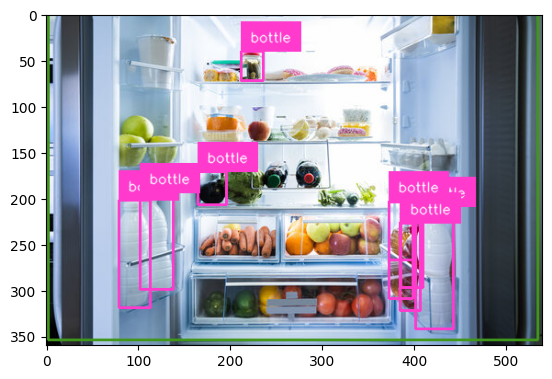

In [32]:
plt.imshow(labelled_image)